# Questions
## Major Question: Which property should we sell?
### 1. What are the catastrophe risks/natural disasters? 
### 2. How does incident type affect ih_program_declared? 
### 3. What effect does declaration type have on choosing which property to sell?

In [11]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Read and open both csv files
big_file = 'us_disaster_declarations.csv'
small_file = 'us_disasters_m5.csv'
big_df = pd.read_csv(big_file)

In [32]:
# Clean data
# Create table with specific columns
big_df = big_df.loc[:,("state", "declaration_type", "declaration_date", "fy_declared",
                      "incident_type","declaration_title","ih_program_declared",
                      "designated_area")]

# Exclude certain values
values = ["El Dorado (County)", "San Diego (County)", "Los Angeles (County)"]
big_df = big_df[big_df["designated_area"].isin(values) == True]

big_df.head()

,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,designated_area
212,CA,DR,1964-12-24T00:00:00Z,1965,Flood,Heavy Rains & Flooding,0,El Dorado (County)
723,CA,DR,1965-12-07T00:00:00Z,1966,Flood,Heavy Rains & Flooding,0,San Diego (County)
848,CA,DR,1967-01-02T00:00:00Z,1967,Flood,Severe Storms & Flooding,0,San Diego (County)
1202,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,Los Angeles (County)
1203,CA,DR,1969-01-26T00:00:00Z,1969,Flood,Severe Storms & Flooding,0,El Dorado (County)


### 1. What are the catastrophe risks/natural disasters? 

In [14]:
# What are the catastrophe risks/natural disasters in California?
incidents = big_df["incident_type"].unique()
incidents
#print(f"The catastrophe risks in California are {incidents}")


array(['Flood', 'Fire', 'Earthquake', 'Drought', 'Coastal Storm',
       'Freezing', 'Severe Storm', 'Hurricane', 'Biological'],
      dtype=object)

In [15]:
# What are the catastrophe risks in El Dorado (South Lake Tahoe location)?

ED = big_df.loc[big_df["designated_area"] == "El Dorado (County)"]
ED_incidents = ED["incident_type"].unique()
ED_incidents
#ED_incidents = big_df["designated_area"]== ED

#print(f"The catastrophe risks around South Lake Tahoe are {ED_incidents}")

array(['Flood', 'Drought', 'Severe Storm', 'Fire', 'Hurricane',
       'Biological'], dtype=object)

In [16]:
# What are the catastrophe risks in San Diego (San Diego location)?
SD = big_df.loc[big_df["designated_area"] == "San Diego (County)"]
SD_incidents = SD["incident_type"].unique()
#SD_incidents = SD["designated_area"].unique()
SD_incidents

#print(f"The catastrophe risks around San Diego are {SD_incidents}")

array(['Flood', 'Fire', 'Coastal Storm', 'Freezing', 'Severe Storm',
       'Hurricane', 'Biological'], dtype=object)

In [17]:
# What are the catastrophe risks in Los Angeles (Los Angeles location)?
LA = big_df.loc[big_df["designated_area"] == "Los Angeles (County)"]
LA_incidents = LA["incident_type"].unique()
LA_incidents

#print(f"The catastrophe risks around Los Angeles are {LA_incidents}")

array(['Flood', 'Fire', 'Earthquake', 'Coastal Storm', 'Freezing',
       'Severe Storm', 'Hurricane', 'Biological'], dtype=object)

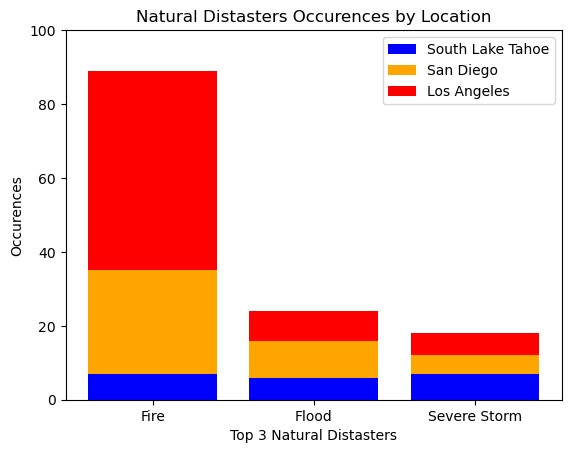

In [18]:
# Stacked Bar Chart showing ED, SD, LA most common incidents
# (Fire, Flood, Severe Storm)
# Want to put the numbers in the chart***

x = ["Fire", "Flood", "Severe Storm"]
ed_y = np.array([7, 6, 7])
sd_y = np.array([28, 10, 5])
la_y = np.array([54, 8, 6])

# plot the bars
ed_plot = plt.bar(x, ed_y, color = "blue")
sd_plot = plt.bar(x, sd_y, color = "orange", bottom = ed_y)
la_plot = plt.bar(x, la_y, color = "red", bottom = ed_y+sd_y)

plt.title("Natural Distasters Occurences by Location")
plt.xlabel("Top 3 Natural Distasters")
plt.ylabel("Occurences")
plt.legend((ed_plot, sd_plot, la_plot), ("South Lake Tahoe", "San Diego",
                                        "Los Angeles"))



# formatting chart
plt.ylim(0, 100)

plt.savefig("Images/DisasterOccurences.png")
plt.show()

In [19]:
incident_counts = big_df["incident_type"].value_counts()
incident_counts

Fire             89
Flood            24
Severe Storm     18
Biological        6
Freezing          4
Earthquake        3
Hurricane         3
Coastal Storm     2
Drought           1
Name: incident_type, dtype: int64

In [20]:
# Which occurs more?
ED_incidents_counts = ED["incident_type"].value_counts()
ED_incidents_counts

Severe Storm    7
Fire            7
Flood           6
Biological      2
Drought         1
Hurricane       1
Name: incident_type, dtype: int64

In [21]:
# Which occurs more?
SD_incidents_counts = SD["incident_type"].value_counts()
SD_incidents_counts

Fire             28
Flood            10
Severe Storm      5
Freezing          2
Biological        2
Coastal Storm     1
Hurricane         1
Name: incident_type, dtype: int64

In [22]:
# Which occurs more?
LA_incidents_counts = LA["incident_type"].value_counts()
LA_incidents_counts

Fire             54
Flood             8
Severe Storm      6
Earthquake        3
Freezing          2
Biological        2
Coastal Storm     1
Hurricane         1
Name: incident_type, dtype: int64

In [34]:
# Yes, ih program was declared
ih_response = big_df.loc[big_df["ih_program_declared"] == 1]
ih_response.head()
# Create a pie chart for 

,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,designated_area
24425,CA,DR,2003-10-27T00:00:00Z,2004,Fire,"Wildfires, Flooding, Mudflow And Debris Flow D...",1,Los Angeles (County)
24426,CA,DR,2003-10-27T00:00:00Z,2004,Fire,"Wildfires, Flooding, Mudflow And Debris Flow D...",1,San Diego (County)
26568,CA,DR,2005-02-04T00:00:00Z,2005,Severe Storm,"Severe Storms, Flooding, Debris Flows, And Mud...",1,Los Angeles (County)
26571,CA,DR,2005-02-04T00:00:00Z,2005,Severe Storm,"Severe Storms, Flooding, Debris Flows, And Mud...",1,San Diego (County)
31588,CA,DR,2006-02-03T00:00:00Z,2006,Severe Storm,"Severe Storms, Flooding, Mudslides, And Landsl...",1,El Dorado (County)


In [24]:
# For what incident type was the ih program declared the most?
incident_ihp_decl = ih_response["incident_type"].value_counts()
incident_ihp_decl

Fire            10
Severe Storm     3
Biological       3
Name: incident_type, dtype: int64

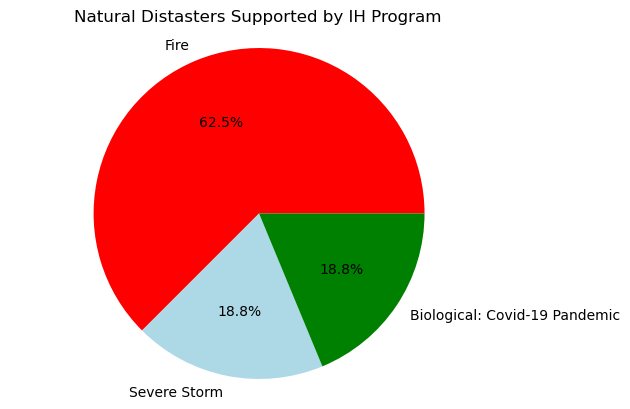

In [25]:
# Pie chart for above
top_incidents_ih = ["Fire", "Severe Storm", "Biological: Covid-19 Pandemic"]
occurences_ih = [10, 3, 3]

colors = ["Red", "lightblue", "green"]

plt.pie(occurences_ih, labels = top_incidents_ih, colors = colors,
       autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Natural Distasters Supported by IH Program")

plt.savefig("Images/DisasterSupported.png")
plt.show()

In [26]:
# For which designated area was the ih program declared the most?
location_ihp_decl = ih_response["designated_area"].value_counts()
location_ihp_decl

Los Angeles (County)    8
San Diego (County)      6
El Dorado (County)      2
Name: designated_area, dtype: int64

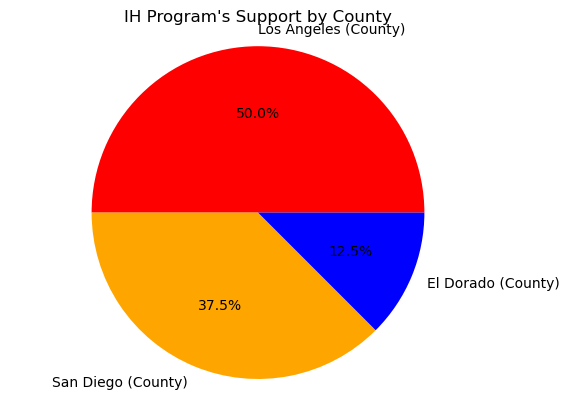

In [27]:
# Pie chart for above
top_area_ih = ["Los Angeles (County)", "San Diego (County)",
               "El Dorado (County)"]
area_occurences_ih = [8, 6, 2]

colors = ["red", "orange", "blue"]

plt.pie(area_occurences_ih, labels = top_area_ih, colors = colors,
       autopct = "%1.1f%%")
plt.axis("equal")
plt.title("IH Program's Support by County")

plt.savefig("Images/LocationsSupported.png")
plt.show()

In [28]:
# DR (major disaster), EM (emergency management), FM (fire management)
# What declaration type occurs the most for each county

# El Dorado
# Create a data frame only showing results from El Dorado
ed_value = ["El Dorado (County)"]
ED_df = big_df[big_df["designated_area"].isin(ed_value) == True]

# Find the declaration type that occurs the most in El Dorado
ED_freq_decl_type = ED_df["declaration_type"].mode()
ED_freq_decl_type

0    DR
dtype: object

In [29]:
# DR (major disaster), EM (emergency management), FM (fire management)
# What declaration type occurs the most for each county

# San Diego
# Create a data frame only showing results from San Diego
sd_value = ["San Diego (County)"]
SD_df = big_df[big_df["designated_area"].isin(sd_value) == True]

# Find the declaration type that occurs the most in San Diego
SD_freq_decl_type = SD_df["declaration_type"].mode()
SD_freq_decl_type

0    DR
dtype: object

In [30]:
# DR (major disaster), EM (emergency management), FM (fire management)
# What declaration type occurs the most for each county

# Los Angeles
# Create a data frame only showing results from Los Angeles
la_value = ["Los Angeles (County)"]
LA_df = big_df[big_df["designated_area"].isin(la_value) == True]

# Find the declaration type that occurs the most in Los Angeles
LA_freq_decl_type = LA_df["declaration_type"].mode()
LA_freq_decl_type

0    FM
dtype: object

In [31]:
val = ["FM"]
la_decl_type_df = LA_df["declaration_type"].value_counts()
la_decl_type_df

FM    38
DR    31
EM     8
Name: declaration_type, dtype: int64